In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

$X= ``Número\ de\ gols\ do\ time\ de\ casa" \sim Poisson(\lambda_x)\\$

# Verificação da variavel resposta

In [5]:
tabela = pd.read_excel('dados/tabela/rodada-26.xlsx')
historico_casa = pd.read_excel('dados/historico/casa-2023-10-08.xlsx')
historico = pd.read_excel('dados/historico/2023-10-08.xlsx')

In [69]:
df = pd.concat([historico['GF'], historico_casa['GF'], historico_casa['GA']], axis=1)
df.columns = ['Todos', 'Casa', 'Fora']

In [74]:
x_todos = df['Todos'].mean()
x_casa = df['Casa'].mean()
x_fora = df['Fora'].mean()
var_todos = df['Todos'].var()
var_casa = df['Casa'].var()
var_fora = df['Fora'].var()
print('Média Historico Geral:', historico['GF'].mean())
print('Var Historico Geral:', historico['GF'].var())
print('Média Historico Casa:', historico_casa['GF'].mean())
print('Var Historico Casa:', historico_casa['GF'].var())
print('Média Historico fora:', historico_casa['GA'].mean())
print('Var Historico fora:', historico_casa['GA'].var())

Média Historico Geral: 1.2355212355212355
Var Historico Geral: 1.271308335138128
Média Historico Casa: 1.4517374517374517
Var Historico Casa: 1.3494058842896062
Média Historico fora: 1.0193050193050193
Var Historico fora: 1.104277034509593


<Axes: xlabel='GF', ylabel='Count'>

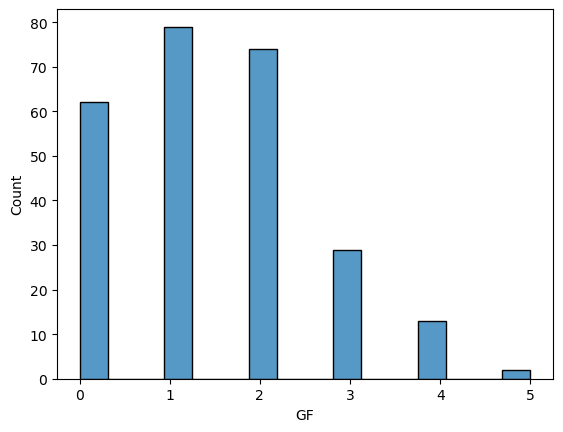

In [59]:
sns.histplot(historico_casa['GF'])

<Axes: xlabel='GA', ylabel='Count'>

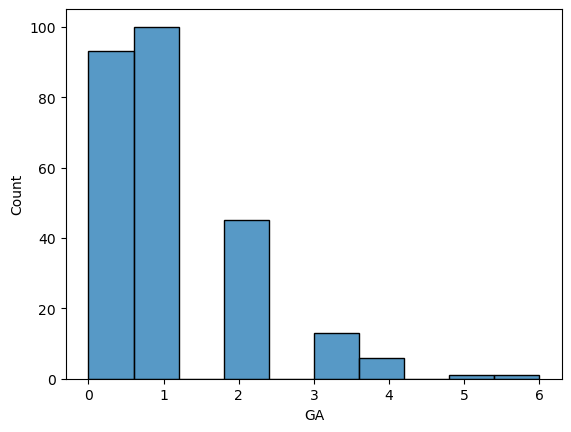

In [61]:
sns.histplot(historico_casa['GA'])

<Axes: xlabel='GF', ylabel='Count'>

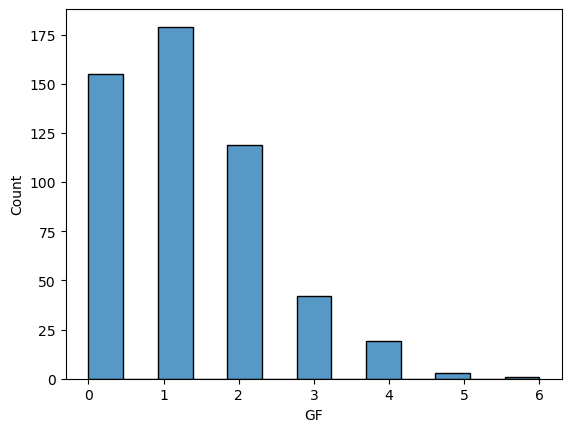

In [62]:
sns.histplot(historico['GF'])

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

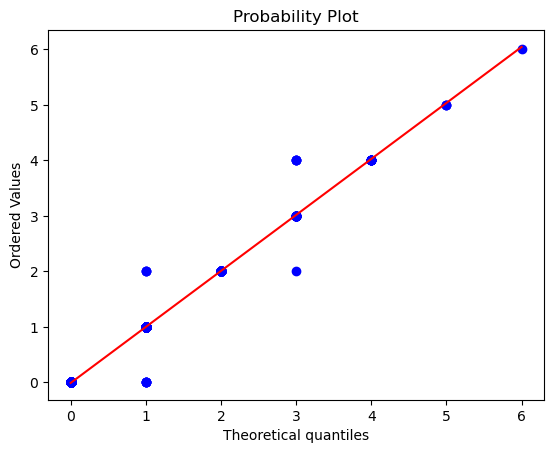

In [80]:
stats.probplot(df['Todos'], dist=stats.poisson, sparams=(x_todos,), plot=plt)

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,

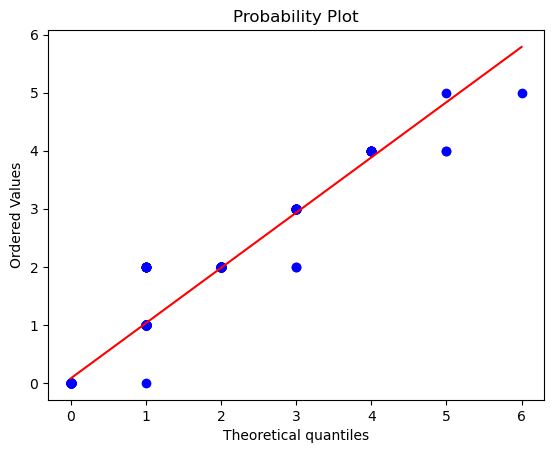

In [78]:
stats.probplot(df['Casa'].dropna(), dist=stats.poisson, sparams=(x_casa,), plot=plt)

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,

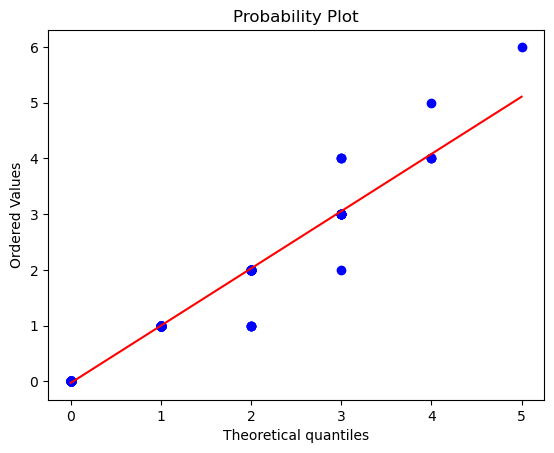

In [79]:
stats.probplot(df['Fora'].dropna(), dist=stats.poisson, sparams=(x_fora,), plot=plt)

In [83]:
df['Casa'].corr(df['Fora'])

0.021404961417770277

# Regressão Poisson